# **EDA**

In [17]:
#import libraries
import pandas as pd
import numpy as np
# data visualization
import seaborn as sns
from matplotlib import pyplot as plot
%matplotlib inline
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
train_df=pd.read_csv("Training_Dataset_v2.csv")                           #Getting the Data
   

In [19]:
train_df.head()              #lets have a look at the dataset

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [38]:
train_df.dtypes

national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue      float64
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk            float64
oe_constraint        float64
ppap_risk            float64
stop_auto_buy        float64
rev_stop             float64
went_on_backorder    float64
dtype: object

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

**There are 23 columns of different types (int(13), float (3) and object(7)). There are missing values in the dataset and maximum missing values are present in feature 'lead_time'**

In [21]:
train_df.shape

(1687861, 23)

In [22]:
train_df.describe(include="all")

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687861,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1687860,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1687860,1687860,1687860,1687860,1687860,1687860
unique,1687861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,1520706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,No,No,No,Yes,No,No
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1686953,NaN,NaN,NaN,NaN,1300377,1687615,1484026,1626774,1687129,1676567
mean,NaN,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,NaN,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,NaN,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,NaN,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,NaN,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN


# **Missing Values**

First step is to check hor many missing values are present in our data.

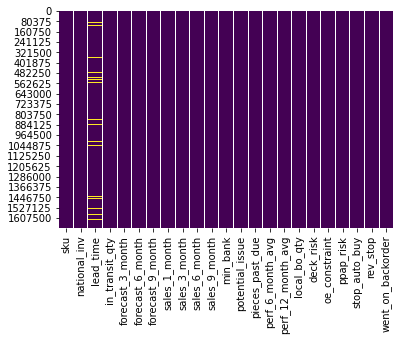

In [23]:
sns.heatmap(train_df.isnull(), cmap='viridis',cbar=False)

In [24]:
train_df.isna().sum()                       #check number of missing values

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [25]:
#(train_df.isna().mean())*100        #check % of missing values

**Now , lets see how many columns are numerical and categorical for better understanding and visualization**

In [26]:
#'sku' is id column. so it is not required

train_df.drop('sku',axis=1,inplace=True)                #drop id column
y=train_df['went_on_backorder']    #target column

In [27]:
Numerical_features=train_df.select_dtypes(exclude=['object'])
Numerical_features.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

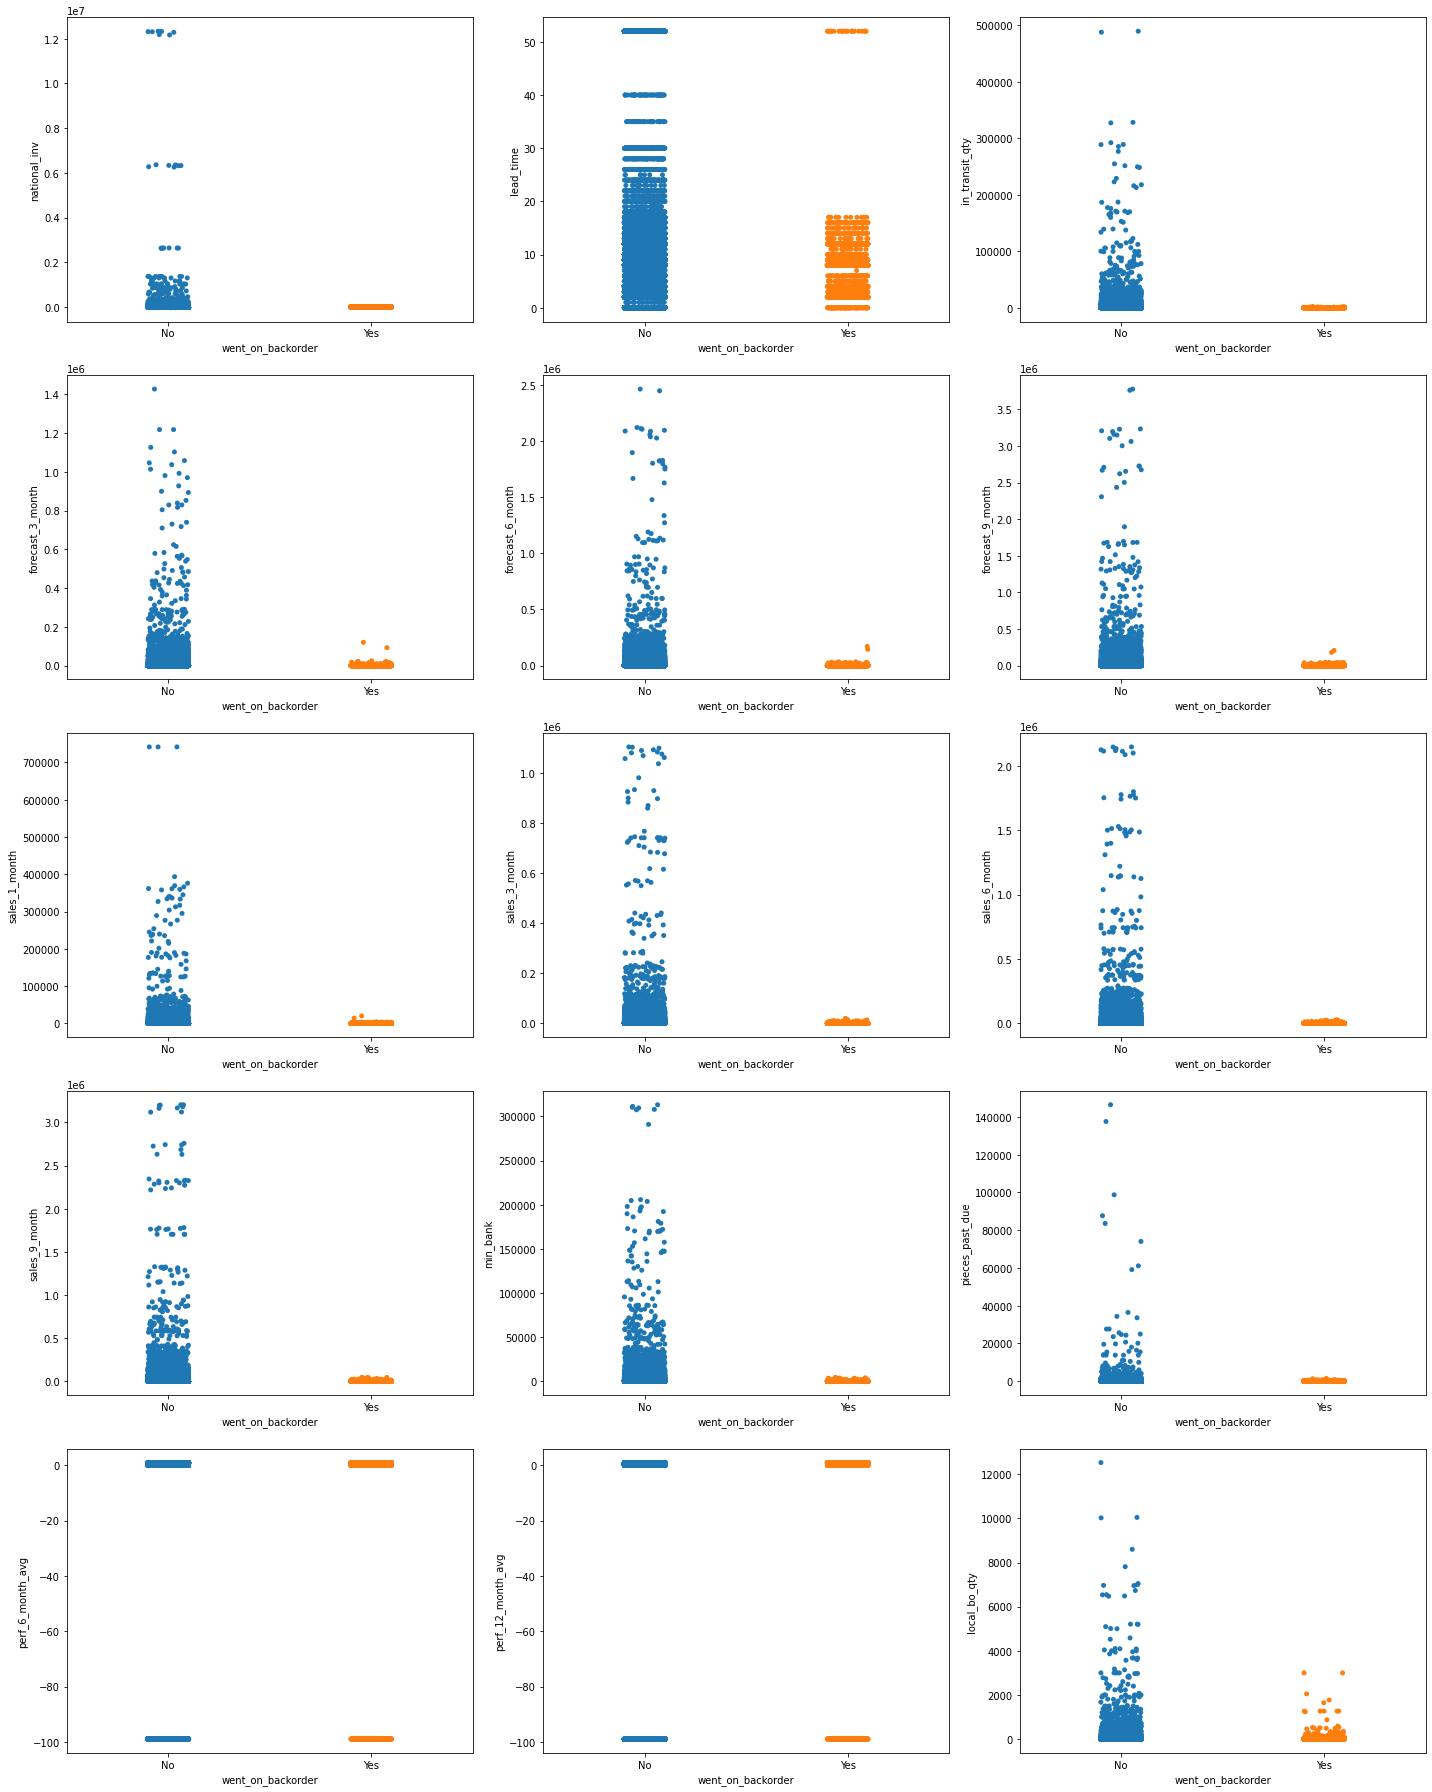

In [28]:
# let's see relationship for target col and every numerical column
plot.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Numerical_features:
    if plotnumber<=15 :
        ax = plot.subplot(5,3,plotnumber)
        sns.stripplot(y,Numerical_features[column])
    plotnumber+=1
plot.tight_layout()

# Categorical Features

In [29]:
Categorical_features=train_df.select_dtypes(include=['object'])
Categorical_features.columns

Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

Distribution of categorical features

In [30]:
#checking how many unique values are in columns
for col in Categorical_features.columns:
    print(len(train_df[col].unique()))

3
3
3
3
3
3
3


In [31]:
str=Categorical_features.columns

In [32]:
train_df[col].unique()

array(['No', 'Yes', nan], dtype=object)

In [34]:
#encoding of categorical
for col in str:
    train_df[col] = train_df[col].map({"Yes" : 0, "No" : 1})

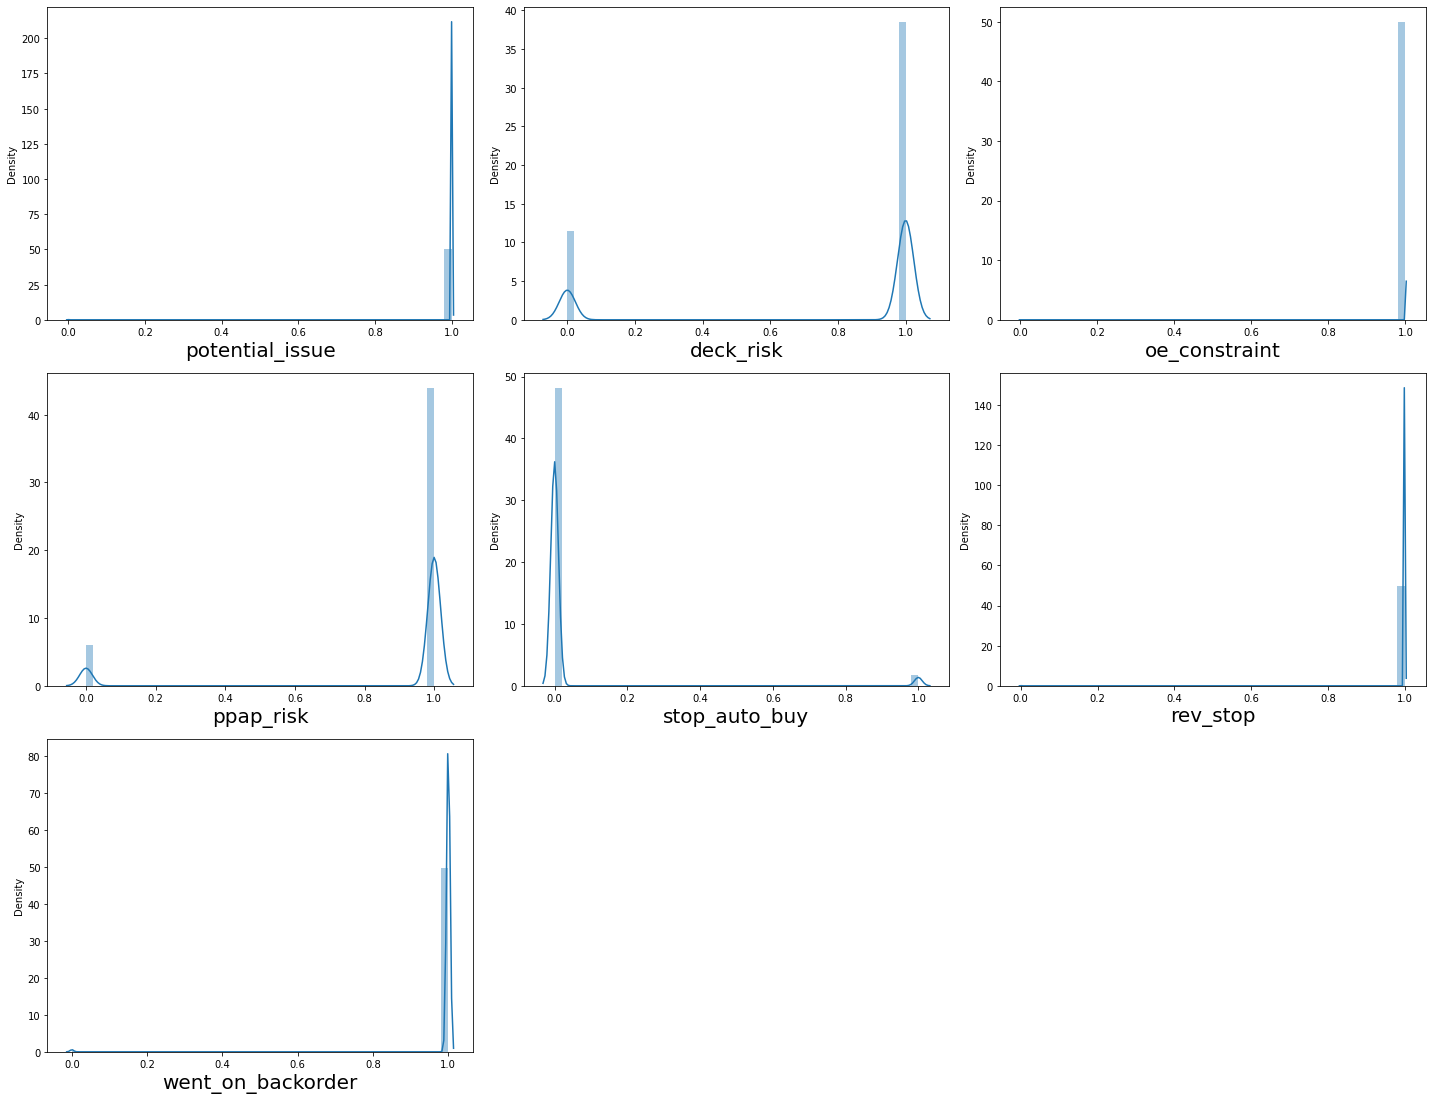

In [35]:
# let's see distributiion of categorical columns
plot.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Categorical_features:
    if plotnumber<=15 :
        ax = plot.subplot(5,3,plotnumber)
        sns.distplot(train_df[column])
        plot.xlabel(column,fontsize=20)
    plotnumber+=1
plot.tight_layout()

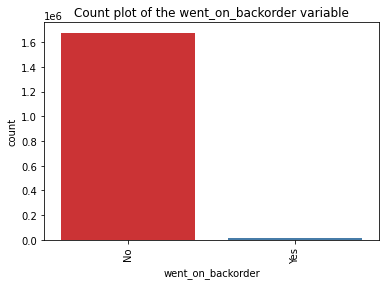

In [37]:
#here  i m ploting the bar graph for went_on_backorder to identify the counting of backorder or not 

sns.countplot(y, palette='Set1')
plot.title("Count plot of the went_on_backorder variable")
plot.xticks(rotation = 90)
plot.show()